## ILP and Hilbert bases

### A first example

First we will construct a new rational polytope:

    


In [1]:
$p=new Polytope<Rational>;

In [2]:
$p->POINTS=<<".";
1 0 0 0
1 1 0 0
1 0 1 0
1 1 1 0
1 0 0 1
1 1 0 1
1 0 1 1
1 1 1 1
.


Note that points in `polymake` are always given in homogenous coordinates. I.e., the point (a,b,c) in R<sup>3</sup> is represented as `1 a b c` in `polymake`.

Now we can examine some properties of `$p`. For instance we can determine the number of facets or whether `$p` is simple:

    


In [3]:
print $p->N_FACETS;

6

Click here for additional output 
 
polymake: used package lrs
 Implementation of the reverse search algorithm of Avis and Fukuda.
 Copyright by David Avis.
 http://cgm.cs.mcgill.ca/~avis/C/lrs.html

In [4]:
print $p->SIMPLE;

true

Click here for additional output 
 
polymake: used package cdd
 cddlib
 Implementation of the double description method of Motzkin et al.
 Copyright by Komei Fukuda.
 http://www-oldurls.inf.ethz.ch/personal/fukudak/cdd_home/


As you might already have noticed, our polytope is just a 3-dimensional cube. So there would have been an easier way to create it using the client `cube`:

    


In [5]:
$c = cube(3,0);

(You can check out the details of any function in the [documentation](https://polymake.org/doku.php/documentation/latest/polytope).)

And we can also verify that the two polytopes are actually equal:

In [6]:
print equal_polyhedra($p,$c);

true

### Another example

Now let us proceed with a somewhat more interesting example: The convex hull of 20 randomly chosen points on the 2-dimensional sphere.

In [7]:
$rs = rand_sphere(3,20);



`polymake` can of course visualise this polytope:

    


In [8]:
$rs->VISUAL;

<!--
polymake for knusper
Thu Mar 3 00:34:23 2022
rs
-->


 
 
 
 rs 
 
 
 
 
 
 
 Transparency 
 
 depthWrite 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

Click here for additional output 
 
polymake: used package threejs
 Three.js is a lightweight cross-browser JavaScript library/API used to create and display animated 3D computer graphics on a Web browser.
 See http://github.com/mrdoob for the source code.

Now we will create yet another new polytope by scaling our random sphere by a factor lambda. (Otherwise there are rather few integral points contained in it.)

To this end, we have to multiply every coordinate (except for the homogenising 1 in the beginning) of every vertex by lamda. Then we can create a new polytope by specifying its vertices.


In [9]:
$lambda=2;

In [10]:
$s=new Matrix<Rational>([[1,0,0,0],[0,$lambda,0,0],[0,0,$lambda,0],[0,0,0,$lambda]]);

In [11]:
print $s;

1 0 0 0
0 2 0 0
0 0 2 0
0 0 0 2


In [12]:
$scaled_rs=new Polytope<Rational>(VERTICES=>($rs->VERTICES * $s), LINEALITY_SPACE=>[]);



`polymake` can visualise the polytope together with its lattice points:

    


In [13]:
$scaled_rs->VISUAL->LATTICE_COLORED;

<!--
polymake for knusper
Thu Mar 3 00:34:23 2022
scaled_rs
-->


 
 
 
 scaled_rs 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 depthWrite 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

Now will construct the integer hull of `$scaled_rs` and visualise it:

In [14]:
$integer_hull=new Polytope<Rational>(POINTS=>$scaled_rs->LATTICE_POINTS);
$integer_hull->VISUAL->LATTICE_COLORED;

<!--
polymake for knusper
Thu Mar 3 00:34:23 2022
integer_hull
-->


 
 
 
 integer_hull 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 depthWrite 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->


In order to obtain the integer hull we simply define a new polytope `$integer_hull` as the convex hull of all `LATTICE_POINTS` contained in `$scaled_rs`.

Note that if we give `POINTS` (in contrast to `VERTICES`) `polymake` constructs a polytope that is the convex hull of the given points regardless of whether they are vertices or not. I.e., redundacies are allowed here.

If you specify `VERTICES` you have to make sure yourself that your points are actually vertices since `polymake` does not check this. You also need to specify the `LINEALITY_SPACE`, see [ Tutorial on polytopes](apps_polytope.ipynb).

### Linear Programming

Now that we have constructed a nice integral polytope we want to apply some linear program to it.

First we define a `LinearProgram` with our favourite `LINEAR_OBJECTIVE`. The linear objective is an given as a vector of length d+1, d being the dimension of the space. The vector [c<sub>0</sub>,c<sub>1</sub>, ..., c<sub>d</sub>] corresponds to the linear objective c<sub>0</sub> + c<sub>1</sub>x<sub>1</sub> + ... + c<sub>d</sub>x<sub>d</sub>.

    


In [15]:
$objective=new LinearProgram<Rational>(LINEAR_OBJECTIVE=>[0,1,1,1]);


Then we define a new polytope, which is a copy of our old one (`$inter_hull`) with the LP as an additional property.

    


In [16]:
$ilp=new Polytope<Rational>(VERTICES=>$integer_hull->VERTICES, LP=>$objective);

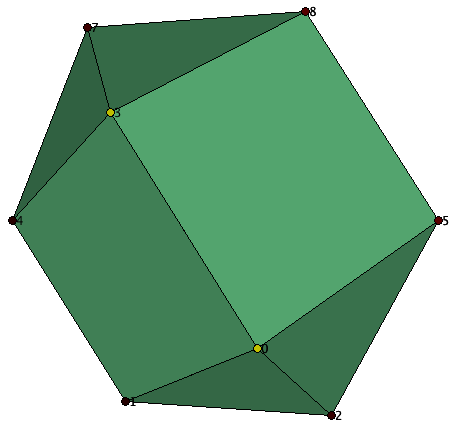
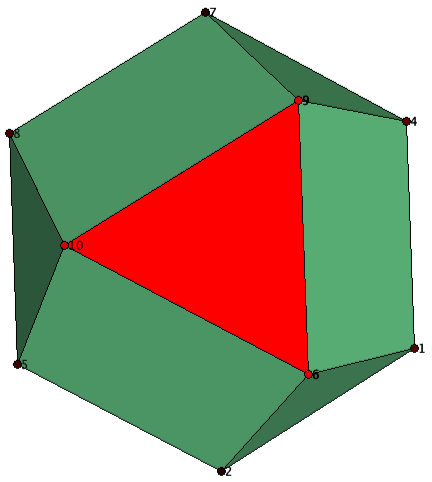

And now we can perform some computations:

In [17]:
print $ilp->LP->MAXIMAL_VALUE;

3

In [18]:
print $ilp->LP->MAXIMAL_FACE;

{11}

In [19]:
$ilp->VISUAL->MIN_MAX_FACE;

<!--
polymake for knusper
Thu Mar 3 00:34:24 2022
ilp
-->


 
 
 
 ilp 
 
 
 
 
 
 
 Transparency 
 
 depthWrite 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->


Hence the LP attains its maximal value 2 on the  2-face spanned by the vertices 6, 9 and 10.

`polymake` can visualise the polytope and highlight both its maximal and minimal face in a different (by default admittedly almost painful ;-) ) colour. Here you see the maximal face `{6 9 10}` in red and the minimal face `{0 3}` (on the opposite side of the polytope) in yellow.


Note though that since we started out with a random polytope these results may vary if we perform the same computations another time on a different random polytope.

    


In [20]:
print $ilp->VERTICES;

1 -1 -1 -1
1 -1 -1 0
1 -1 0 1
1 -1 1 0
1 -1 1 1
1 0 -1 0
1 0 -1 1
1 0 1 -1
1 1 0 0
1 1 0 1
1 1 1 -1
1 1 1 1



### Hilbert bases

Finally, we can have `polymake` compute and print a Hilbert basis for the cone spanned by `$ilp`.  Notice that this requires normaliz or 4ti2 to be installed in order to work.

    


In [21]:
print $ilp->HILBERT_BASIS;

1 -1 -1 -1
1 -1 -1 0
1 -1 0 0
1 -1 0 1
1 -1 1 0
1 -1 1 1
1 0 -1 0
1 0 -1 1
1 0 0 -1
1 0 0 0
1 0 0 1
1 0 1 -1
1 0 1 0
1 0 1 1
1 1 0 0
1 1 0 1
1 1 1 -1
1 1 1 0
1 1 1 1


Click here for additional output 
 
polymake: used package libnormaliz
 [[wiki:external_software#Normaliz]] is a tool for computations in affine monoids, vector configurations, lattice polytopes, and rational cones.
 Copyright by Winfried Bruns, Bogdan Ichim, Christof Soeger.
 http://www.math.uos.de/normaliz/